In [ ]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [ ]:
!nvidia-smi

Mon Oct 27 14:54:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             27W /   70W |   12024MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from roboflow import download_dataset

dataset = download_dataset('https://universe.roboflow.com/nasaspaceflight/rocket-detect/dataset/36', 'yolov8')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rocket-Detect-36 in yolov8:: 100%|██████████| 24094/24094 [00:05<00:00, 4551.13it/s]


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

names:
- Engine Flames
- Rocket Body
- Space
nc: 3
roboflow:
  license: CC BY 4.0
  project: rocket-detect
  url: https://universe.roboflow.com/nasaspaceflight/rocket-detect/dataset/36
  version: 36
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=10)

New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Rocket-Detect-36/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /content/Rocket-Detect-36/train/labels.cache... 8406 images, 1701 backgrounds, 0 corrupt: 100%|██████████| 8406/8406 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Rocket-Detect-36/valid/labels.cache... 2376 images, 472 backgrounds, 0 corrupt: 100%|██████████| 2376/2376 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      12.6G      3.658      7.094      3.527          7        640: 100%|██████████| 526/526 [04:47<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:24<00:00,  3.06it/s]


                   all       2376       2687      0.128      0.116     0.0594     0.0159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.03G      2.782      2.608      2.508          7        640: 100%|██████████| 526/526 [04:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.48it/s]


                   all       2376       2687      0.255      0.225      0.171     0.0535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.17G      2.499      2.199      2.221          3        640: 100%|██████████| 526/526 [04:25<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.60it/s]

                   all       2376       2687      0.599      0.255      0.215     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.16G      2.347      1.966      2.075          7        640: 100%|██████████| 526/526 [04:25<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.51it/s]


                   all       2376       2687       0.37       0.32       0.28      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.19G       2.19      1.788       1.95          6        640: 100%|██████████| 526/526 [04:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.60it/s]

                   all       2376       2687       0.45      0.406      0.371      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.16G      2.036      1.605      1.823          8        640: 100%|██████████| 526/526 [04:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.61it/s]

                   all       2376       2687       0.52      0.424      0.435      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.19G      1.935      1.495      1.741          7        640: 100%|██████████| 526/526 [04:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.45it/s]

                   all       2376       2687      0.504       0.46      0.457      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.16G       1.87       1.39      1.674          5        640: 100%|██████████| 526/526 [04:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.59it/s]

                   all       2376       2687      0.597      0.466      0.497      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.19G       1.79      1.313      1.626          5        640: 100%|██████████| 526/526 [04:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.46it/s]

                   all       2376       2687      0.551      0.531      0.538      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.16G      1.707      1.241      1.576          5        640: 100%|██████████| 526/526 [04:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.53it/s]


                   all       2376       2687       0.59      0.528      0.549      0.278

10 epochs completed in 0.796 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 18.6MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,075,369 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


                   all       2376       2687       0.59      0.529      0.549      0.278
         Engine Flames       1062       1075      0.659      0.789      0.811       0.46
           Rocket Body       1168       1200      0.614        0.6      0.622      0.313
                 Space        342        412      0.496      0.197      0.214     0.0611
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

import os
HOME = os.getcwd()
print(HOME)

args.yaml					   train_batch0.jpg
events.out.tfevents.1761576304.0d0b29278d6f.679.0  train_batch1.jpg
labels_correlogram.jpg				   train_batch2.jpg
labels.jpg					   weights
/content


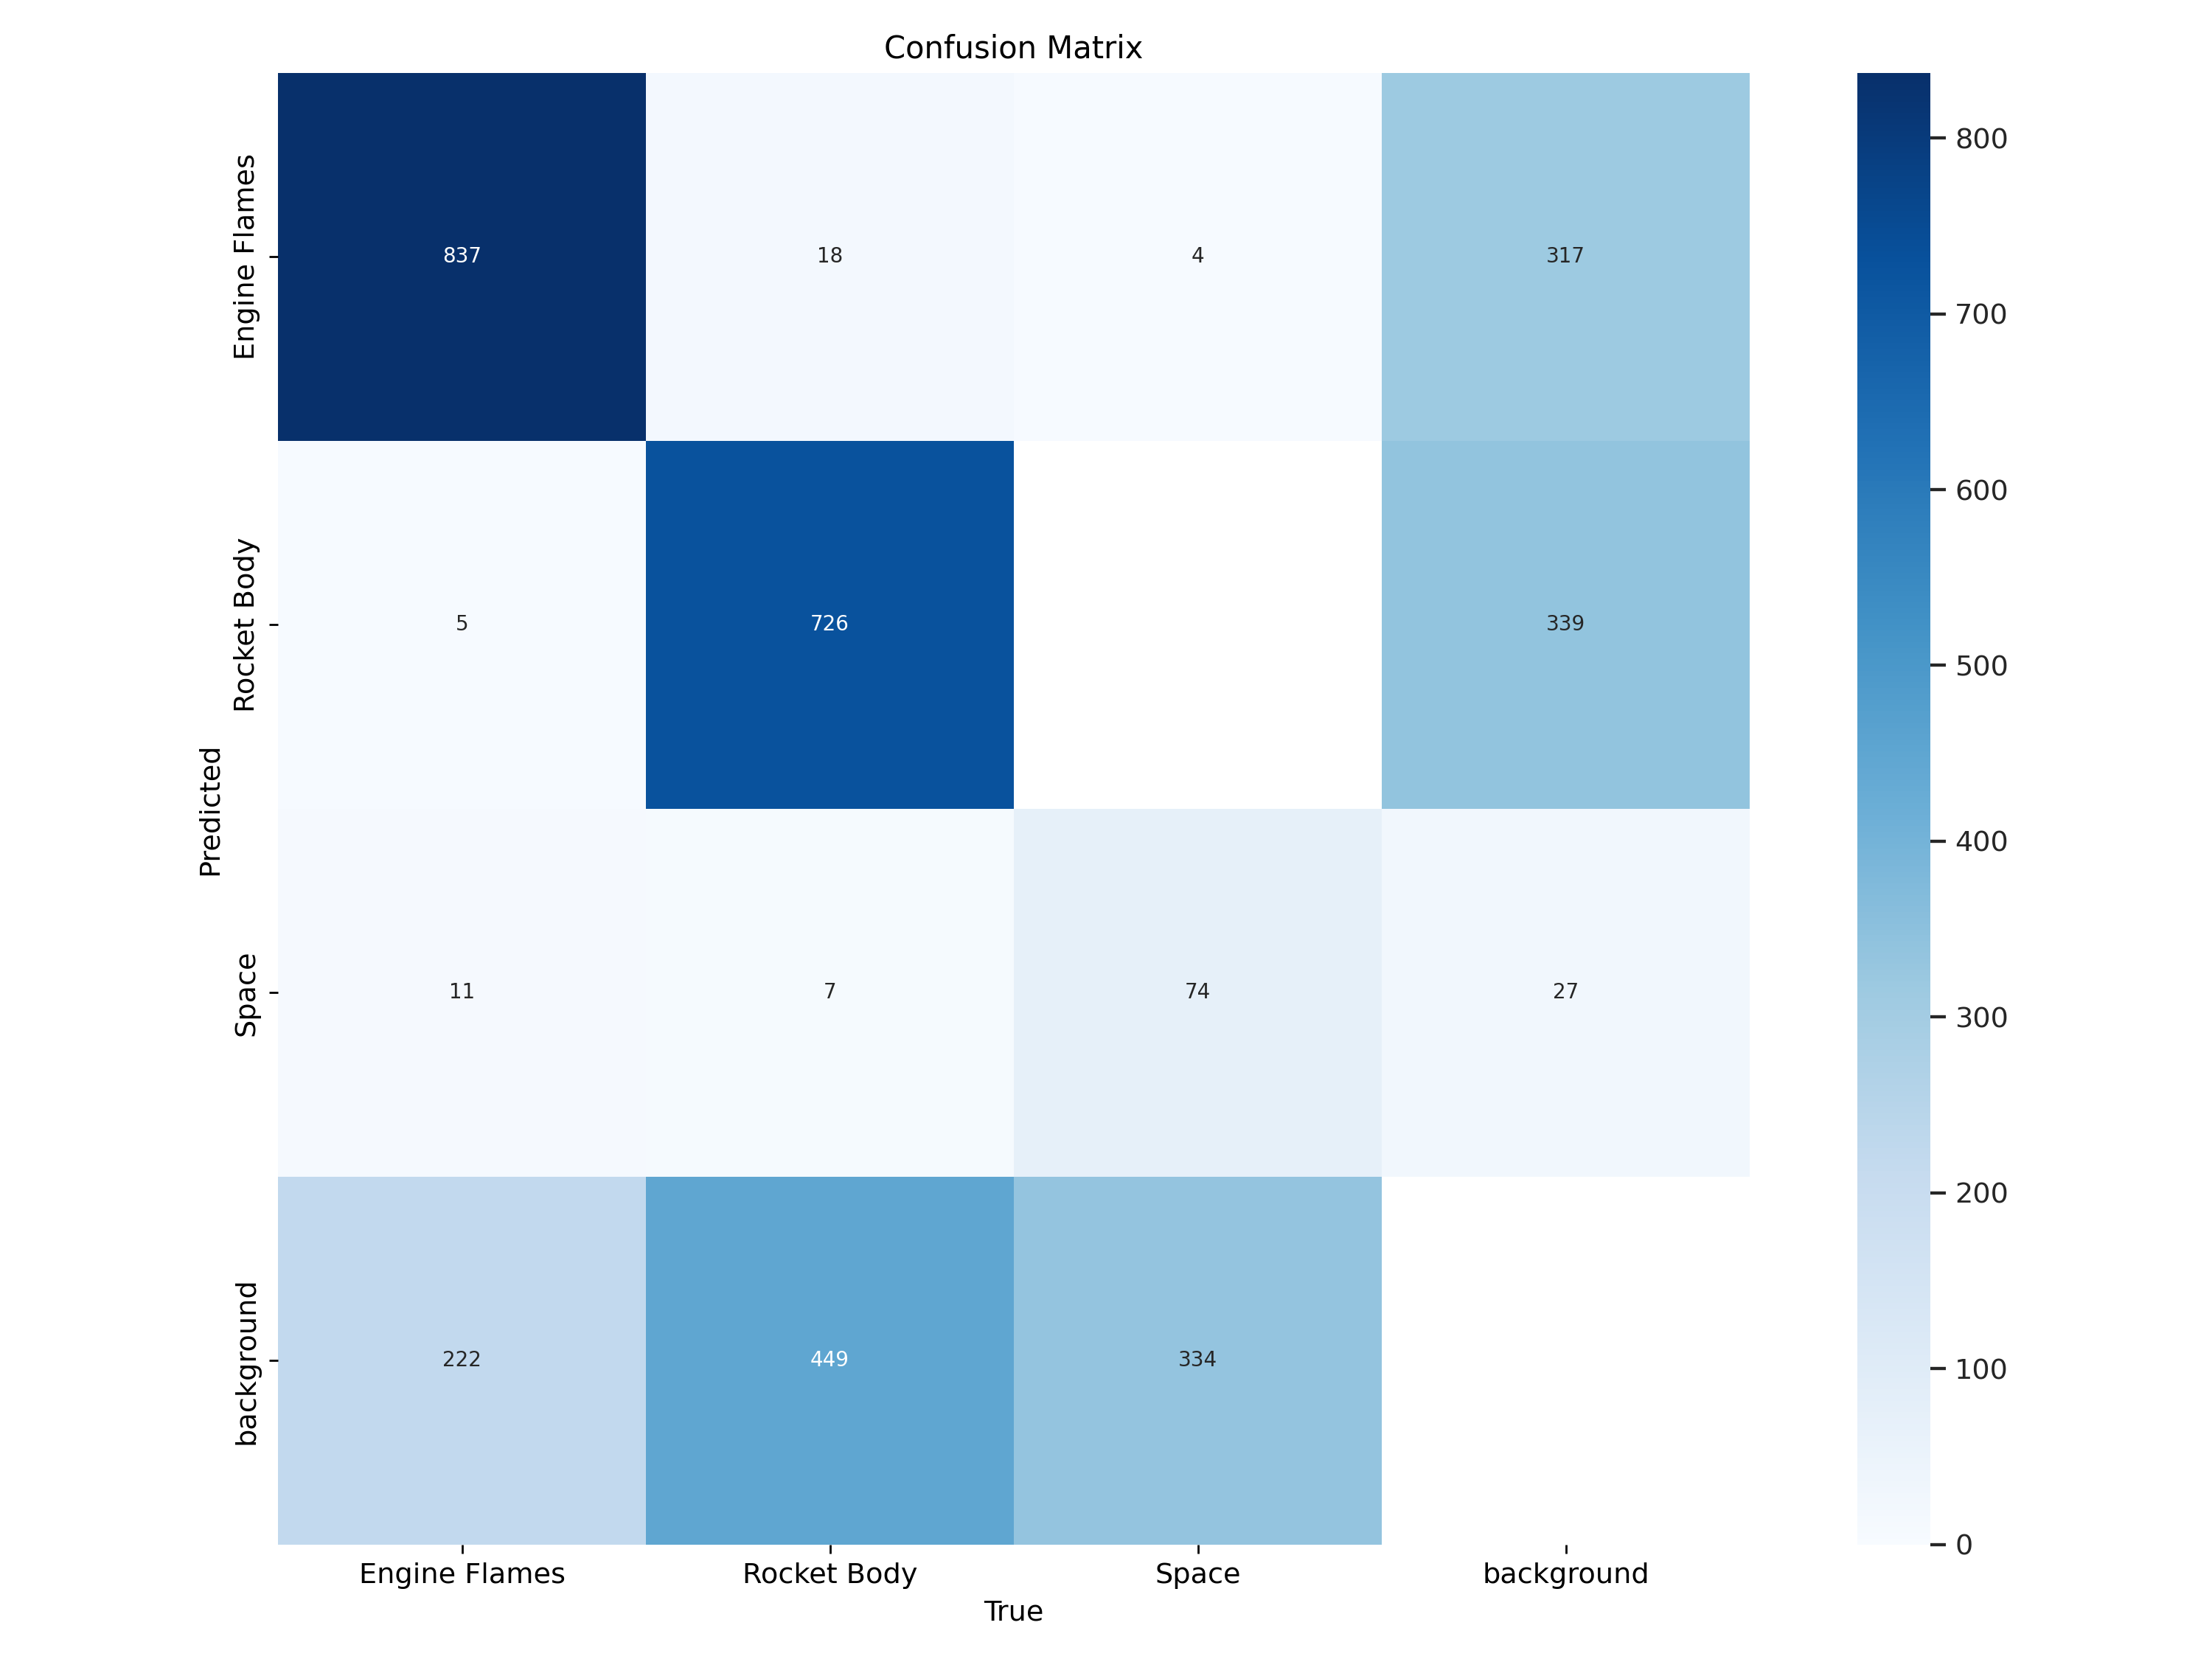

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=1000)

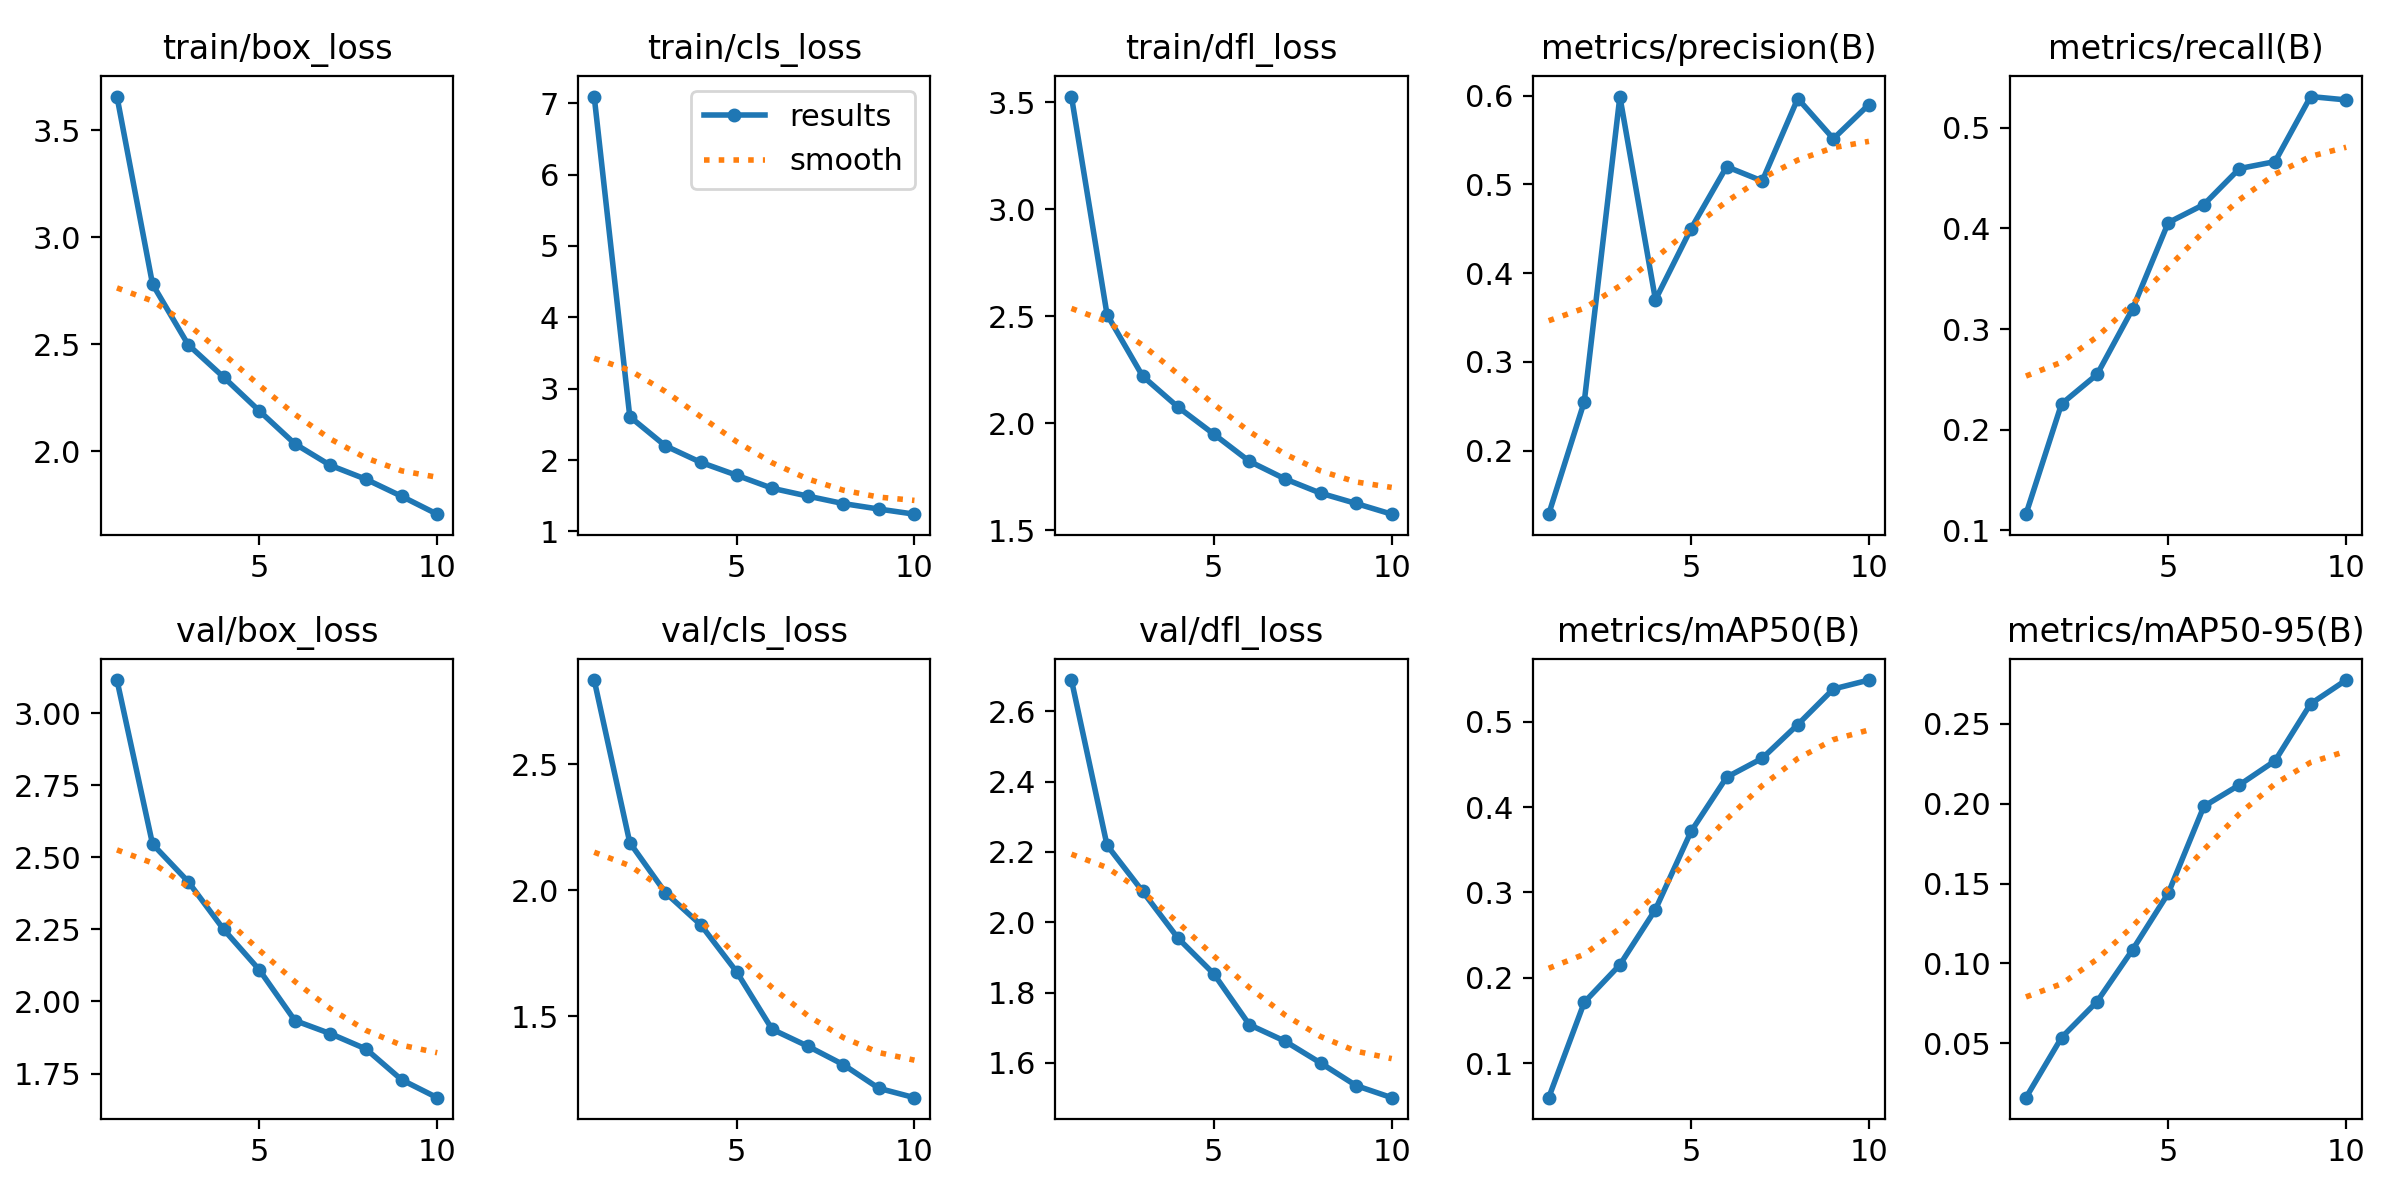

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train6/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['Engine Flames', 'Rocket Body', 'Space']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train6/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.24981097254471146
mAP 50 0.4595420017033557
mAP 75 0.2587800066062628


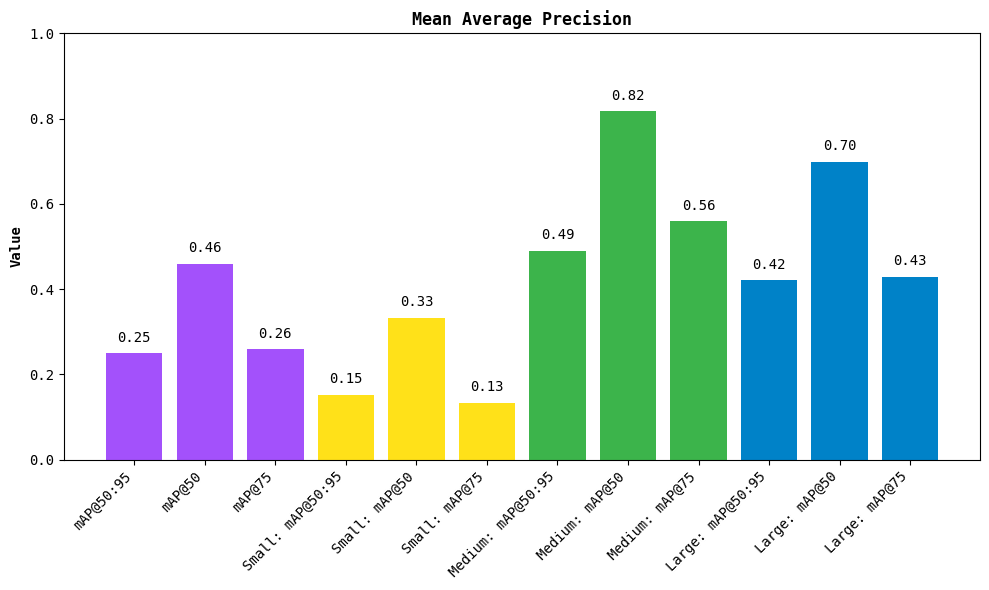

In [ ]:
map.plot()

In [ ]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train6/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

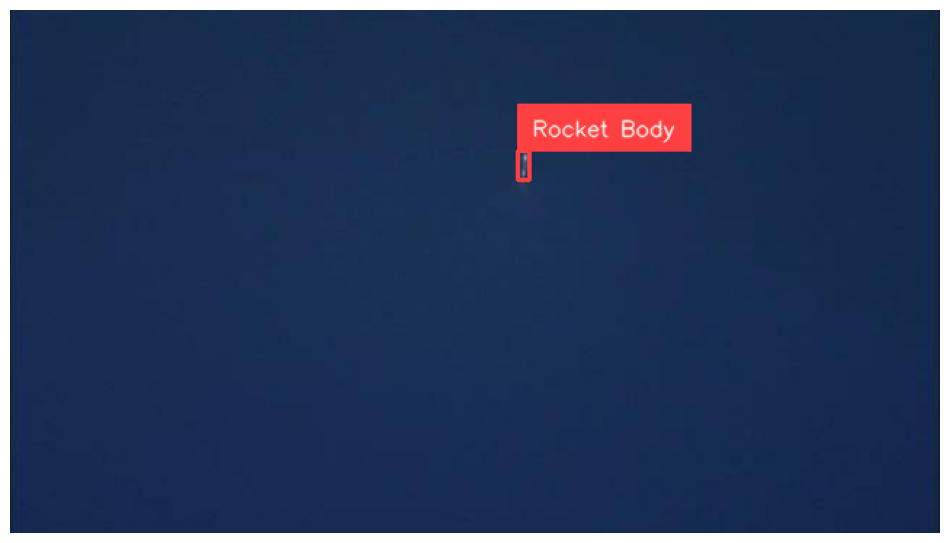

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)